In [37]:
import json

a_no_to_symbol = {1:"H", 2:"He", 3:"Li", 4:"Be", 5:"B", 6:"C", 7:"N", 8:"O", 9:"F", 10:"Ne",
    11:"Na", 12:"Mg", 13:"Al", 14:"Si", 15:"P", 16:"S", 17:"Cl", 18:"Ar", 19:"K", 20:"Ca",
    21:"Sc", 22:"Ti", 23:"V", 24:"Cr", 25:"Mn", 26:"Fe", 27:"Co", 28:"Ni", 29:"Cu", 30:"Zn",
    31:"Ga", 32:"Ge", 33:"As", 34:"Se", 35:"Br", 36:"Kr", 37:"Rb", 38:"Sr", 39:"Y", 40:"Zr",
    41:"Nb", 42:"Mo", 43:"Tc", 44:"Ru", 45:"Rh", 46:"Pd", 47:"Ag", 48:"Cd", 49:"In", 50:"Sn",
    51:"Sb", 52:"Te", 53:"I", 54:"Xe", 55:"Cs", 56:"Ba", 57:"La", 58:"Ce", 59:"Pr", 60:"Nd",
    61:"Pm", 62:"Sm", 63:"Eu", 64:"Gd", 65:"Tb", 66:"Dy", 67:"Ho", 68:"Er", 69:"Tm", 70:"Yb",
    71:"Lu", 72:"Hf", 73:"Ta", 74:"W", 75:"Re", 76:"Os", 77:"Ir", 78:"Pt", 79:"Au", 80:"Hg",
    81:"Tl", 82:"Pb", 83:"Bi", 84:"Po", 85:"At", 86:"Rn", 87:"Fr", 88:"Ra", 89:"Ac", 90:"Th",
    91:"Pa", 92:"U", 93:"Np", 94:"Pu", 95:"Am", 96:"Cm", 97:"Bk", 98:"Cf", 99:"Es", 100:"Fm",
    101:"Md", 102:"No", 103:"Lr", 104:"Rf", 105:"Db", 106:"Sg", 107:"Bh", 108:"Hs", 109:"Mt", 110:"Ds",
    111:"Rg"}

symbol_to_a_no = {}
for a_no in a_no_to_symbol:
    symbol_to_a_no[a_no_to_symbol[a_no]] = a_no

input_file = None
# with open("gdmbf4_48_exess.json") as f:
#     input_file = json.load(f)
with open("gdmbf4_48_1frag.json") as f:
    input_file = json.load(f)

#with open("w210.json") as f:
#    input_file = json.load(f)['topology']

symbols = input_file['symbols']
raw_coords = input_file['geometry']

# with open("w210.json") as f:
#     input_file = json.load(f)
# symbols = input_file['topology']['symbols']
# raw_coords = input_files['topology']['symbols']
coords = []
for i in range(0, len(raw_coords), 3):
    coords.append([raw_coords[i],raw_coords[i+1],raw_coords[i+2]])

    
class Atom:
    def __init__(self, coord, a_no):
        self.coord = coord
        self.a_no = a_no    
        
atoms = []
for (symbol, coord) in zip(symbols,coords):
    atoms.append(Atom(coord, symbol_to_a_no[symbol]))
print(symbols)

['H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'F', 'F', 'F', 'B', 'F', 'F', 'F', 'F', 'B', 'F', 'F', 'F', 'F', 'B', 'F', 'F', 'F', 'F', 'B', 'F', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'F', 'F', 'F', 'B', 'F', 'F', 'F', 'F', 'B', 'F', 'F', 'F', 'F', 'B', 'F', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'H', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'N', 'N', 'H', 'H', 'H', 'H', 'N', 'C', 'H', 'H', 'F', 'F', 'F', 'B', 'F', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'H', 'H', 'N', 'N', 'H', 'H', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'N', 'N', 'H', 'H', 'H', 'H', 'N', 'C', 'H', 'H', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'F', 'F', 'F', 'B', 'F', 'F', 'F', 'F', 'B', 'F', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H', 'H', 'H', 'N', 'C', 'H', 'H', 'N', 'N', 'H', 'H',

In [46]:
class Fragment:
    def __init__(self, atoms):
        self.atoms = []
        self.charge = 0
        self.weighted_centre = [0.0,0.0,0.0]
        for atom in atoms:
            self.add_atom(atom)
            
    def add_atom(self, atom):
        self.atoms.append(atom)
        self.charge += atom.a_no
        for i in range(3):
            self.weighted_centre[i] += atom.coord[i]*atom.a_no
            
    def centre_of_charge(self):
        return [self.weighted_centre[i]/self.charge for i in range(3)]
    
    def locality(self):
        centre = self.centre_of_charge()
        dist = 0.0
        for atom in self.atoms:
            dist += cart(atom.coord,centre)**2
        dist /= len(atoms)
        dist /= max([cart(atom.coord, centre) for atom in atoms])**2
        return dist**0.5
    
def union(fragments):
    new_frag = Fragment([])
    for frag in fragments:
        new_frag.atoms.extend(frag.atoms)
        new_frag.charge += frag.charge
        for i in range(3):
            new_frag.weighted_centre[i] += frag.weighted_centre[i]
    return new_frag

def cart(x,y):
    return ((x[0]-y[0])**2 + (x[1]-y[1])**2 + (x[2]-y[2])**2)**0.5
    
nfrag = len(input_file["fragments"])
fragments = []

for atom_ixs in input_file["fragments"]:
    fragments.append(Fragment([atoms[i] for i in atom_ixs]))
    
#for i in range(0,len(atoms),3):
#    fragments.append(Fragment([atoms[i],atoms[i+1],atoms[i+2]]))
print(len(fragments))

96


In [261]:

def generate_fragments(natoms, connectivity):
    frags = [i for i in range(natoms)]
    for x,y in connectivity:
        lhs = min(x,y)
        rhs = max(x,y)
        for i in range(natoms):
            if frags[i] == rhs:
                frags[i] = frags[lhs]
    
    for i in range(natoms):
        frags[i] = -frags[i]
    
    frag_label = 0
    ix = 0
    while ix < natoms:
        if frags[ix] < 0:
            temp = frags[ix]
            for i in range(ix,natoms):
                if frags[i] == temp:
                    frags[i] = frag_label
            frag_label += 1
        ix += 1
        
    print(frags)
    
    

generate_fragments(len(input_file['symbols']), [(x[0],x[1]) for x in input_file['connectivity']])

[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

In [31]:
from sklearn.cluster import KMeans
import numpy as np

def pair_fragments(fragsA, fragsB):
    frags = fragsA + fragsB
    
    membership = 0
    for i in range(len(fragsA)):
        membership.append(i)
    for i in range(len(fragsB)):
        membership.append(i)

def cluster_fragments(frags, multiplicity):
    print("Clustering")
    centres = np.array([frag.centre_of_charge() for frag in frags])
    weights = np.array([frag.charge for frag in frags])
    
    clusters = len(frags)//multiplicity
    print(clusters)
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(centres, sample_weight=weights)
    
    print("Equalizing")
    
    membership = equalize_clusters(frags, kmeans.labels_, kmeans.cluster_centers_)
    new_frag_ixs = [[] for i in range(clusters)]
    for i in range(len(membership)):
        new_frag_ixs[membership[i]].append(i)
    
    new_frags = [union([frags[i] for i in ixs]) for ixs in new_frag_ixs]
    return new_frags

def equalize_clusters(frags, membership, centroids):
    # make clusters equal sizes
    def gain(i,j):
        ci = centroids[membership[i]]
        cj = centroids[membership[j]]
        current = cart(frags[i].centre_of_charge(),ci) + cart(frags[j].centre_of_charge(),cj)
        swapped = cart(frags[j].centre_of_charge(),ci) + cart(frags[i].centre_of_charge(),cj)
        return current - swapped
    
    def fragsize(i):
        return sum([1 if mem == i else 0 for mem in membership])
    
    for i in range(10):
        print("Iteration",i)
        # Calculate centroids
        #print("ITER")
        for i in range(len(centroids)):
            cent = [0.0,0.0,0.0]
            n = 0
            for (j,mem) in enumerate(membership):
                if mem == i:
                    cent[0] += frags[j].centre_of_charge()[0]*frags[j].charge
                    cent[1] += frags[j].centre_of_charge()[1]*frags[j].charge
                    cent[2] += frags[j].centre_of_charge()[2]*frags[j].charge
                    n += frags[j].charge
            if n > 0:
                cent[0] /= n
                cent[1] /= n
                cent[2] /= n
            centroids[i] = cent
        
        distance_map = {}
        outgoing = {}
        for i in range(len(centroids)):
            distance_map[i] = []
            outgoing[i] = []


        deltas = []
        for i,frag in enumerate(frags):
            mem = membership[i]
            clust = -1
            best_alternative = 1000000.0
            for j,centroid in [(j,centroids[j]) for j in range(len(centroids)) if j != mem]:
                dist = cart(frag.centre_of_charge(),centroid)
                if dist < best_alternative:
                    best_alternative = dist
                    clust = j
            deltas.append((i,best_alternative-cart(frag.centre_of_charge(),centroids[membership[i]]),clust))



        #deltas = [(i,cart(frag.centre_of_charge(),centroids[membership[i]])-min([cart(frag.centre_of_charge(),centroid) for centroid in centroids]) for i,frag in enumerate(frags)]
        deltas = sorted(deltas, key=lambda x: x[1])
#         print("OLD LABELS")
#         print(membership)
#         print("COUNTS")
#         print([fragsize(i) for i in range(len(centroids))])

        for (i,delta,best) in deltas:
            for (j,centroid) in enumerate(centroids):
                if membership[i] == j:
                    continue

                done = False
                for k in range(len(outgoing[j])):
                    if gain(i,outgoing[j][k]) > 0:
                        swap = outgoing[j].pop(k)
                        #print("Swap", i, "with", swap, "for gain")
                        membership[i], membership[swap] = membership[swap], membership[i]
                        done = True
                        break
                if done:
                    break

                if fragsize(j) < len(frags)//len(centroids) < fragsize(membership[i]):
                    #print("Move frag", i, "to cluster", j, "for size")
                    membership[i] = j
                    break
                    
                outgoing[membership[i]].append(i)

        #print(deltas)    
#         print("NEW LABELS")
#         print(membership)
#         print("COUNTS")
#         print([fragsize(i) for i in range(len(centroids))])
    return membership
            
            
    


# CALUM CALUM CALUM CALUM
# NEXT MAKE SURE FRAGMENTS ARE EQUAL SIZE
# WILL NEED TO EXPIREMENT WITH DIFFERENT METHODS

Clustering
14
Equalizing
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Old fragment locality:
Worst: 0.0034517698894822543
Best:  0.001842590871098179
New fragment locality:
Worst: 0.058456792283428
Best:  0.05057374722014991


In [ ]:
enlarged_fragments = cluster_fragments(fragments,15)
print("Old fragment locality:")
print("Worst:",max([frag.locality() for frag in fragments]))
print("Best: ",min([frag.locality() for frag in fragments]))


print("New fragment locality:")
print("Worst:",max([frag.locality() for frag in enlarged_fragments]))
print("Best: ",min([frag.locality() for frag in enlarged_fragments]))

In [30]:
print("Old fragment locality:")
print("Worst:",max([frag.locality() for frag in fragments]))
print("Best: ",min([frag.locality() for frag in fragments]))

print("New fragment locality:")
print("Worst:",max([frag.locality() for frag in enlarged_fragments]))
print("Best: ",min([frag.locality() for frag in enlarged_fragments]))

Old fragment locality:
Worst: 0.0034517698894822543
Best:  0.001842590871098179
New fragment locality:
Worst: 5.135830285226893
Best:  1.992479677529585


In [32]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

def plot_fragments(frags, highlight = -1):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for (i,frag) in enumerate(frags):
        xs = [atom.coord[0] for atom in frag.atoms]
        ys = [atom.coord[1] for atom in frag.atoms]
        zs = [atom.coord[2] for atom in frag.atoms]
        
        c = None
        if highlight >= 0:
            c = '#1f77b4' if i != highlight else '#ff7f0e'
        ax.scatter(xs,ys,zs,c=c)
        
fragment_index = 0

3


<IPython.core.display.Javascript object>


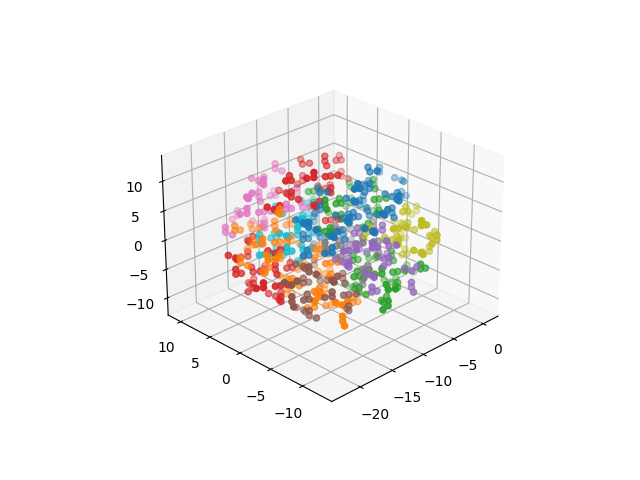

In [36]:
print(fragment_index)
plot_fragments(enlarged_fragments)#,fragment_index)
fragment_index += 1

6


<IPython.core.display.Javascript object>


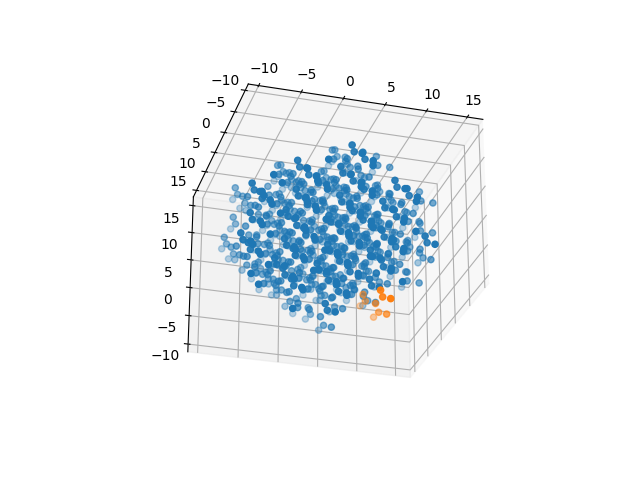

In [42]:
print(fragment_index)
plot_fragments(fragments,1)#,fragment_index)
fragment_index += 1

In [155]:
bad = 0
for frag in fragments:
    for a1,a2 in zip(frag.atoms, fragments[0].atoms):
        if a1.a_no != a2.a_no:
            bad += 1
print(bad)

130
